### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


### Problems

**Use the prompts below to get started with your data analysis.**

**1. Read in the `coupons.csv` file.**




In [63]:
data = pd.read_csv('data/coupons.csv')

In [64]:
data.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


**2. Investigate the dataset for missing or problematic data.**

In [65]:
# Count the missing values and percentages
missing_data = data.isnull().sum()
missing_data_percentage = (missing_data / len(data)) * 100

# Combine counts and percentages into a new df
missing_data_info = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage (%)': missing_data_percentage})

# Filter and sort columns that have missing data
missing_data_info = missing_data_info[missing_data_info['Missing Count'] > 0]
missing_data_info.sort_values(by='Missing Count', ascending=False, inplace=True)

missing_data_info


,Missing Count,Missing Percentage (%)
car,12576,99.148534
CoffeeHouse,217,1.710817
Restaurant20To50,189,1.490066
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Bar,107,0.843582


**3. Decide what to do about your missing data -- drop, replace, other...**

In [66]:
## Since the percentage of missing values for all but cars is under 2%, I will choose the following:
## There are no missing numerican values to replace. Fill missing categorical values with the most common value (mode). 
## Drop car alltogether as more than 99% of the data is missing.

# Drop the 'car' column
if 'car' in data.columns: data = data.drop(columns=['car'])

# Fill missing values for categorical columns using the most common value (mode)
data.update({col: data[col].fillna(data[col].mode()[0]) for col in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']})

# Verify the missing values are handled
missing_values_summary = data.isnull().sum()
missing_values_summary

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

**4. What proportion of the total observations chose to accept the coupon?**



In [67]:
# Calculate the percentage of customers who accepted the coupon
coupon_acceptance_percentage = data['Y'].mean() * 100

coupon_acceptance_percentage


56.84326710816777

**5. Use a bar plot to visualize the `coupon` column.**

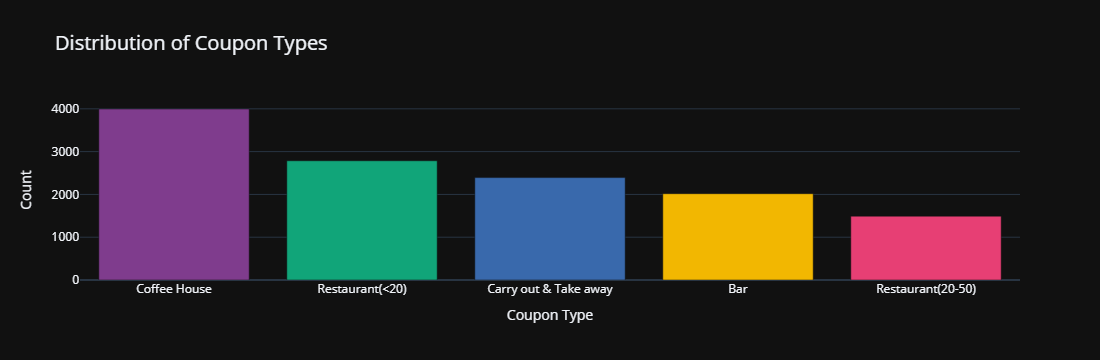

In [68]:
# Count the occurrences of each coupon type and reset the index to form a new df
coupon_counts = data['coupon'].value_counts().reset_index()

# Rename columns
coupon_counts.columns = ['coupon', 'count']  

# Create a bar plot for the 'coupon' column
fig = px.bar(
    data_frame=coupon_counts,
    x='coupon',
    y='count',
    labels={'coupon': 'Coupon Type', 'count': 'Count'},
    title='Distribution of Coupon Types',
    color='coupon',
    color_discrete_sequence=px.colors.qualitative.Bold
)

# Change layout for a dark mode because I get bored easily...
fig.update_layout(
    xaxis_title='Coupon Type',
    yaxis_title='Count',
    showlegend=False,
    title_font_size=20,
    template='plotly_dark'
)

fig.show()



## THIS (AND THE OTHER) SEABORN PLOTS ARE TO ADDRESS A POTENTIAL MISUNDERSTANDING OF THE ASSIGNMENT. WITHIN THE BODY OF THE ASSIGNMENT, THE OVERVIEW, DATA AND DELIVERABLES PARAGRAPHS DO NOT SPECIFY ANY EXCLUSIVE PLOT METHOD AND I CHOSE PLOTLY AS MY PREFERRED METHOD. HOWEVER, AFTER COMPLETLING THE ASSIGNMENT AND REVIEWING THE RUBRIC, I NOTICED UNDER: "Syntax and Code Quality" THE LINE: "Demonstrates competency with seaborn". I HOPE LEAVING MY LEGACY WORK WILL NOT COUNT AGAINST ME.

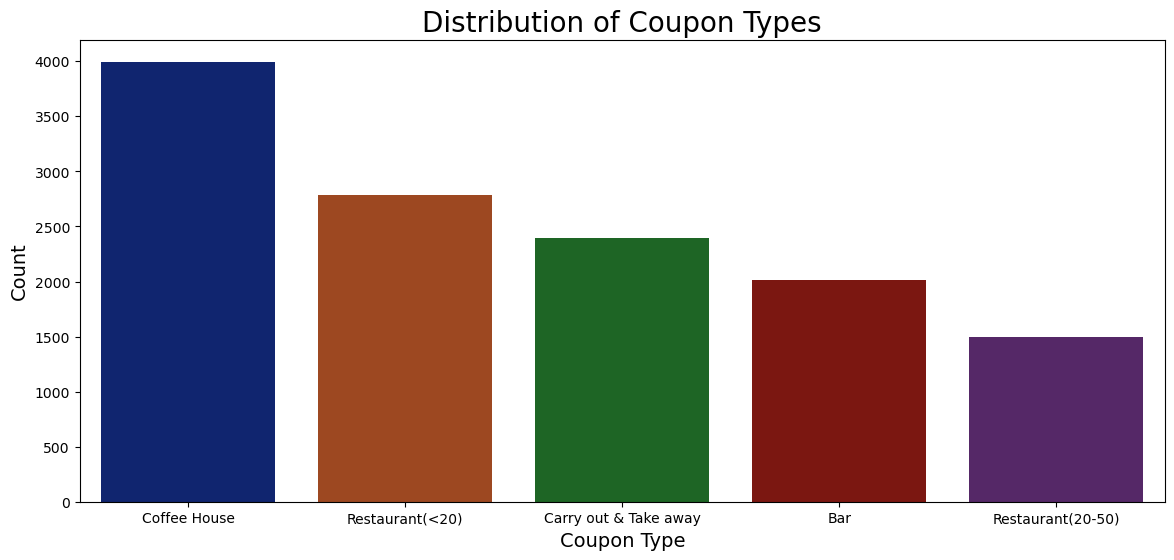

In [69]:
# Make seaborn plot
sns.barplot(data=coupon_counts, x='coupon', y='count', palette='dark').figure.set_size_inches(14, 6) #set size to fill width better

# Set title and axis labels
plt.title('Distribution of Coupon Types', fontsize=20)
plt.xlabel('Coupon Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

**6. Use a histogram to visualize the temperature column.**

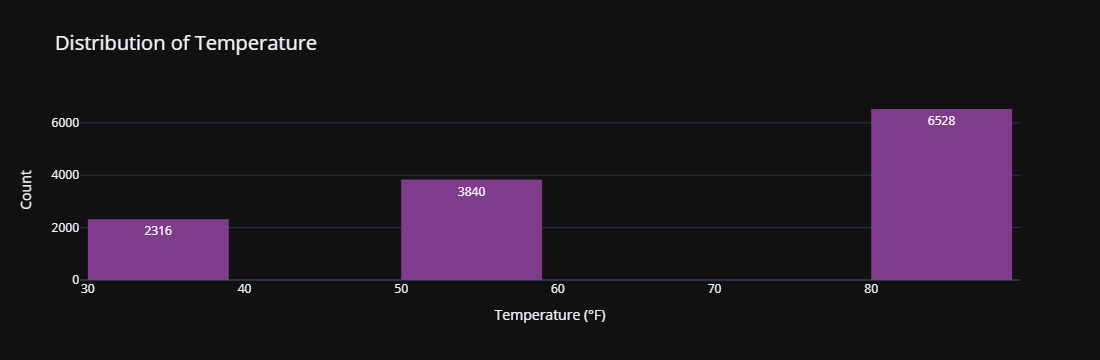

In [70]:
## I was unable to center the X axis label for some reason? I might come back to this later...

# Make a histogram for the 'temperature' column
fig = px.histogram(
    data_frame=data,
    x='temperature',
    nbins=10,  # Adjust the number of bins as needed
    labels={'temperature': 'Temperature (°F)'},
    title='Distribution of Temperature',
    color_discrete_sequence=px.colors.qualitative.Bold,
    text_auto=True  # Automatically add counts within bars
)

# Same layout
fig.update_layout(
    xaxis_title='Temperature (°F)',
    yaxis_title='Count',
    title_font_size=20,
    template='plotly_dark',  # Use the same dark theme
    bargap=0.1  # Adjust this value to control the gap between bars
)

fig.show()


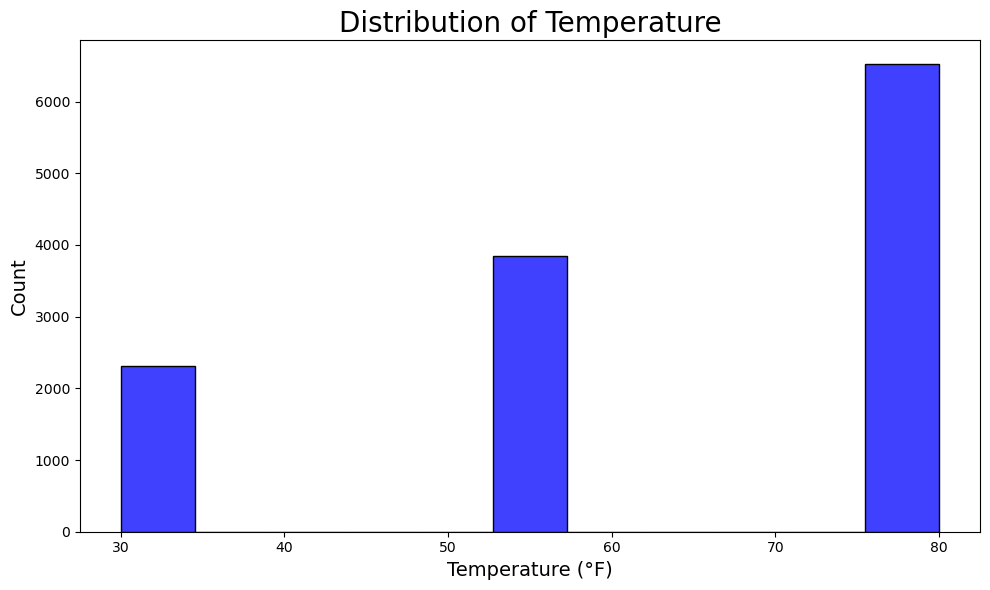

In [89]:
# Replace all infinite values in the dataset with NaN - This is to address the "Future Warning" message, not correct an error
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop any rows with NaN values to support the Future Wanring concern
data.dropna(subset=['temperature'], inplace=True)

# Create a histogram for the 'temperature' column
plt.figure(figsize=(10, 6))
sns.histplot(
    data=data,
    x='temperature',
    bins=11,  # Adjust the number of bins as needed
    color='blue'  # Choose a bold color
)

# Set plot title and axis labels
plt.title('Distribution of Temperature', fontsize=20)
plt.xlabel('Temperature (°F)', fontsize=14)
plt.ylabel('Count', fontsize=14)


# Adjust layout for better spacing and readability
plt.tight_layout()
plt.show()

In [72]:
## I was confused by the fact there where only 3 temperatures. I did not trust my code, so...
## But there it is - Only 3 temperatures? seems like week data collection to me...

# Count the number of instances of each temperature
temperature_counts = data['temperature'].value_counts().reset_index()

# Rename the columns
temperature_counts.columns = ['Temperature (°F)', 'Count']

temperature_counts


,Temperature (°F),Count
0,80,6528
1,55,3840
2,30,2316


**Investigating the Bar Coupons**

**Now, we will lead you through an exploration of just the bar related coupons.**

**1. Create a new `DataFrame` that contains just the bar coupons.**


In [73]:
# Filter data to include only rows related to bar coupons
bar_coupons = data[data['coupon'].str.contains('Bar', case=False, na=False)]

bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


**2. What proportion of bar coupons were accepted?**


In [74]:
# Calculate the percentage of accepted bar coupons
bar_coupon_acceptance_percentage = bar_coupons['Y'].mean() * 100

bar_coupon_acceptance_percentage

41.00148735746158

**3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.**


In [75]:
# Divide into two groups: those who visit bars 3 or fewer times per month vs. those who visit more than 3 times
bar_3_or_fewer = bar_coupons[bar_coupons['Bar'].isin(['0', '1', '2', '3'])]
bar_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4', '8', 'gt8'])]

# Calculate acceptance rates for each group
acceptance_rate_3_or_fewer = bar_3_or_fewer['Y'].mean() * 100
acceptance_rate_more_than_3 = bar_more_than_3['Y'].mean() * 100

acceptance_rate_3_or_fewer, acceptance_rate_more_than_3

(nan, 73.46938775510205)

In [76]:
## nan value threw me off... checking for confirmaton of value.

# Print the count of rows after filtering into groups
print("Rows in 'bar_3_or_fewer':", len(bar_3_or_fewer))
print("Rows in 'bar_more_than_3':", len(bar_more_than_3))

# Check the actual data in both subsets
print("Sample data in 'bar_3_or_fewer':")
print(bar_3_or_fewer.head())

print("Sample data in 'bar_more_than_3':")
print(bar_more_than_3.head())


Rows in 'bar_3_or_fewer': 0
Rows in 'bar_more_than_3': 49
Sample data in 'bar_3_or_fewer':
Empty DataFrame
Columns: [destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y]
Index: []

[0 rows x 25 columns]
Sample data in 'bar_more_than_3':
         destination  passanger weather  temperature  time coupon expiration gender age maritalStatus  ...  CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp  Y
156  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   Male  26        Single  ...          gt8       gt8                  gt8              gt8                1                 0                 0              0             1  1
167   

In [77]:
## nan = 0. I will rewrite the code to address nan result I do not want...

## Different method to change nan results to 0. It's lambda time!
calculate_acceptance_rate = lambda df: df['Y'].mean() * 100 if not pd.isna(df['Y'].mean()) else 0

# Calculate acceptance rates using that lambda function
acceptance_rate_3_or_fewer = calculate_acceptance_rate(bar_3_or_fewer)
acceptance_rate_more_than_3 = calculate_acceptance_rate(bar_more_than_3)

acceptance_rate_3_or_fewer, acceptance_rate_more_than_3

(0, 73.46938775510205)

**4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?**


In [102]:
# Filter for drivers who go to bars more than once a month AND are over 25 years old. 
#used negation '~' to exclude age groups. Cleaner this way.
criteria_group = bar_coupons[bar_coupons['Bar'].isin(['1', '2', '3', '4', '8', 'gt8']) & ~(bar_coupons['age'].isin(['below21', '21', '26to30']))]

# Filter for drivers who DO NOT meet the criteria above
all_others = bar_coupons[~bar_coupons.index.isin(criteria_group.index)]

# Calculate acceptance rates for both groups
acceptance_rate_criteria = calculate_acceptance_rate(criteria_group)
acceptance_rate_others = calculate_acceptance_rate(all_others)

# per the question above: "Is there a difference?"
acceptance_difference = acceptance_rate_criteria - acceptance_rate_others
if acceptance_difference > 0:
    conclusion = f"Yes, there is a difference. The acceptance rate for drivers who go to bars more than once a month AND are over 25 is {acceptance_rate_criteria:.2f}% compared to {acceptance_rate_others:.2f}% for all others, a difference of {acceptance_difference:.2f} percentage points."
else:
    conclusion = "No, there isn't a difference between the groups."

# Show the results as a tuple with a separate conclusion statement to answer the question: "Is there a difference?"
result = (acceptance_rate_criteria, acceptance_rate_others)
result, conclusion


((70.0, 40.56366381479617),
 'Yes, there is a difference. The acceptance rate for drivers who go to bars more than once a month AND are over 25 is 70.00% compared to 40.56% for all others, a difference of 29.44 percentage points.')

**5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**


In [79]:
# Filter for drivers who go to bars MORE THAN once a month, WITH non-kid passengers, AND occupations OTHER THAN farming, fishing, or forestry
criteria_group_2 = bar_coupons[
    bar_coupons['Bar'].isin(['1', '2', '3', '4', '8', 'gt8']) &  # MORE THAN once a month
    ~(bar_coupons['passanger'].isin(['Kid(s)'])) &  # WITH NON-KID passengers
    ~(bar_coupons['occupation'].str.contains('farming|fishing|forestry', case=False, na=False)) # OTHER THAN farming, fishing, or forestry
]

# Filter for drivers who DO NOT meet the criteria above
all_others_2 = bar_coupons[~bar_coupons.index.isin(criteria_group_2.index)]

# Calculate acceptance rates for both groups
acceptance_rate_criteria_2 = calculate_acceptance_rate(criteria_group_2)
acceptance_rate_others_2 = calculate_acceptance_rate(all_others_2)

# per the question above: "Is there a difference?"
acceptance_difference_2 = acceptance_rate_criteria_2 - acceptance_rate_others_2
if acceptance_difference_2 > 0:
    conclusion_2 = f"Yes, there is a difference. The acceptance rate for drivers who go to bars more than once a month, have non-kid passengers, and work in occupations other than farming, fishing, or forestry is {acceptance_rate_criteria_2:.2f}% compared to {acceptance_rate_others_2:.2f}% for all others, a difference of {acceptance_difference_2:.2f} percentage points."
else:
    conclusion_2 = "No, there isn't a significant difference between the groups."

# Show the results as a tuple with a separate conclusion statement to answer the question: "Is there a difference?"
result = (acceptance_rate_criteria_2, acceptance_rate_others_2)
result, conclusion_2


((72.91666666666666, 40.22346368715084),
 'Yes, there is a difference. The acceptance rate for drivers who go to bars more than once a month, have non-kid passengers, and work in occupations other than farming, fishing, or forestry is 72.92% compared to 40.22% for all others, a difference of 32.69 percentage points.')

**6. Compare the acceptance rates between those drivers who:**

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [80]:
# Criteria 1: Drivers who go to bars MORE THAN ONCE A MONTH, have passengers THAT ARE NOT KIDS, and are NOT WIDOWED
criteria_1 = bar_coupons[
    bar_coupons['Bar'].isin(['1', '2', '3', '4', '8', 'gt8']) &  # more than once a month
    ~(bar_coupons['passanger'].isin(['Kid(s)'])) &  # passengers that are not kids
    ~(bar_coupons['maritalStatus'].str.contains('Widowed', case=False, na=False))  # not widowed
]

# Criteria 2: Drivers who go to bars MORE THAN ONCE A MONTH and are UNDER 30 years old
criteria_2 = bar_coupons[
    bar_coupons['Bar'].isin(['1', '2', '3', '4', '8', 'gt8']) &  # more than once a month
    (bar_coupons['age'].isin(['21', '26to30']))  # under 30
]

# Criteria 3: Drivers who go to cheap restaurants MORE THAN 4x A MONTH and earn LESS THAN 50K
criteria_3 = bar_coupons[
    bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8']) &  # more than 4x a month
    bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])  # less than 50K
]

# Calculate acceptance rates for each criteria
acceptance_rate_criteria_1 = calculate_acceptance_rate(criteria_1)
acceptance_rate_criteria_2 = calculate_acceptance_rate(criteria_2)
acceptance_rate_criteria_3 = calculate_acceptance_rate(criteria_3)

# Calculate acceptance rate for drivers who don't meet any of these criteria
all_others_combined = bar_coupons[
    ~bar_coupons.index.isin(pd.concat([criteria_1, criteria_2, criteria_3]).index)
]
acceptance_rate_all_others_combined = calculate_acceptance_rate(all_others_combined)

# Create a DataFrame to display the results
acceptance_rates_df = pd.DataFrame({
    'Criteria': [
        "Criteria 1: Bars more than once a month, non-kid passengers, not widowed",
        "Criteria 2: Bars more than once a month, under 30 years old",
        "Criteria 3: Cheap restaurants more than 4x a month, income < 50K",
        "All Others"
    ],
    'Acceptance Rate (%)': [
        acceptance_rate_criteria_1,
        acceptance_rate_criteria_2,
        acceptance_rate_criteria_3,
        acceptance_rate_all_others_combined
    ]
})

# Increase the width for the console output (useful for wide tables)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 200)

# Output directly as a DataFrame
acceptance_rates_df

,Criteria,Acceptance Rate (%)
0,"Criteria 1: Bars more than once a month, non-kid passengers, not widowed",72.916667
1,"Criteria 2: Bars more than once a month, under 30 years old",86.666667
2,"Criteria 3: Cheap restaurants more than 4x a month, income < 50K",45.348837
3,All Others,39.647845


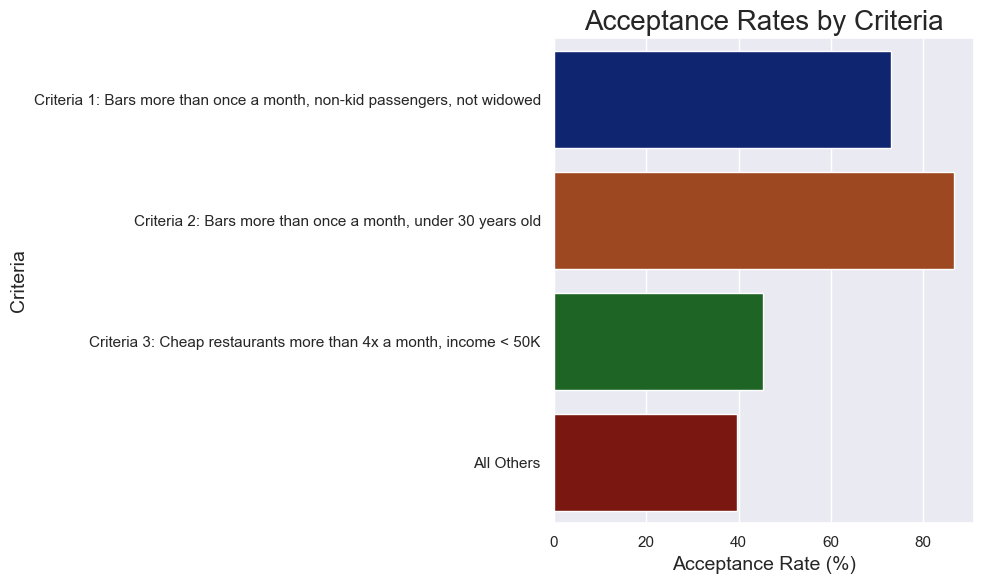

In [99]:
# Chose to show as a plot too - seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=acceptance_rates_df, x='Acceptance Rate (%)', y='Criteria', palette='dark')

# Add a title and adjust labels
plt.title('Acceptance Rates by Criteria', fontsize=20)
plt.xlabel('Acceptance Rate (%)', fontsize=14)
plt.ylabel('Criteria', fontsize=14)

plt.tight_layout() # Makes more viewable
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Age and Frequency of Bar Visits:** 
Drivers under 30 visit bars more than once a month are more likely to accept bar coupons. Being younger, they likely have more flexible schedules, and larger social circles that promote bar outings, and a preference for trying new venues, which can make them more responsive to bar promotions.
**Marital Status and Passenger Type:** 
Drivers who are not widowed and have passengers other than kids are more inclined to accept bar coupons. This might be because adults who go out with friends or partners are more willing to engage in social activities at bars compared to those accompanied by children.

**Income and Restaurant Visits:** 
Drivers who visit inexpensive restaurants more than four times a month and earn less than $50K tend to accept bar coupons. This suggests a preference for cost-effective dining and a higher responsiveness to discounts and deal.

**Social and Economic Factors:**
The combination of social dynamics (like going to bars more frequently with non-kid passengers) and economic status (less than $50K income) indicates that affordability and lifestyle habits influence the likelihood of accepting bar coupons

Bar coupon acceptance and use appear to be influenced by demogrpahic factors such as age, income, marital status and lifestyle. .

### Independent Investigation

**Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.**

# Acceptance Rates for Bar Coupons by Time of Day and Passenger Type

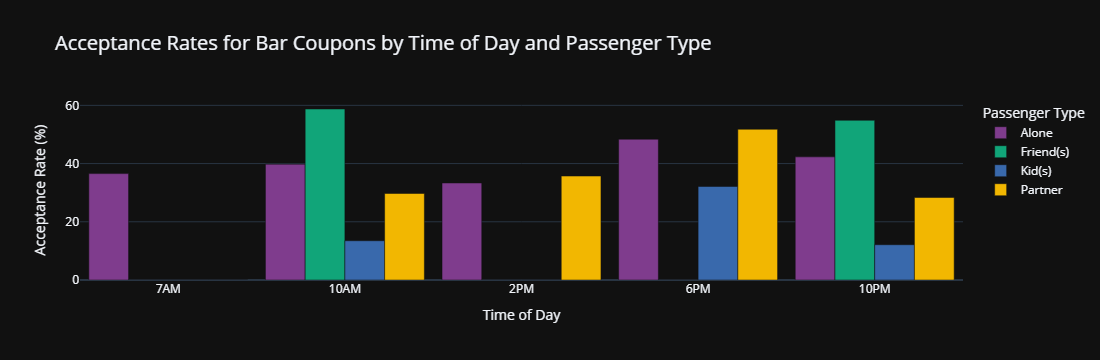

In [82]:
# Define a custom ordered list of time periods
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']

# Group data by time and passenger type, then calculate acceptance rates
time_passenger_group = bar_coupons.groupby(['time', 'passanger'])['Y'].mean().reset_index()
time_passenger_group.columns = ['Time of Day', 'Passenger Type', 'Acceptance Rate']
time_passenger_group['Acceptance Rate'] *= 100  # Convert to percentage

# Convert 'Time of Day' to a categorical variable with the specified custom order
time_passenger_group['Time of Day'] = pd.Categorical(time_passenger_group['Time of Day'], categories=time_order, ordered=True)

# Ensure all specified time periods are included
# Create a new DataFrame index with all combinations of time periods and passenger types
time_passenger_combinations = pd.MultiIndex.from_product([time_order, time_passenger_group['Passenger Type'].unique()], names=['Time of Day', 'Passenger Type'])
time_passenger_group = time_passenger_group.set_index(['Time of Day', 'Passenger Type']).reindex(time_passenger_combinations, fill_value=0).reset_index()

# Create a grouped bar chart using Plotly Express
fig = px.bar(
    data_frame=time_passenger_group,
    x='Time of Day',
    y='Acceptance Rate',
    color='Passenger Type',
    barmode='group',  # Group bars by passenger type
    labels={'Acceptance Rate': 'Acceptance Rate (%)'},
    title='Acceptance Rates for Bar Coupons by Time of Day and Passenger Type',
    color_discrete_sequence=px.colors.qualitative.Bold
)

# Maintain earlier format
fig.update_layout(
    xaxis_title='Time of Day',
    yaxis_title='Acceptance Rate (%)',
    title_font_size=20,
    template='plotly_dark',
    bargap=0.1
)

# Display the plot
fig.show()

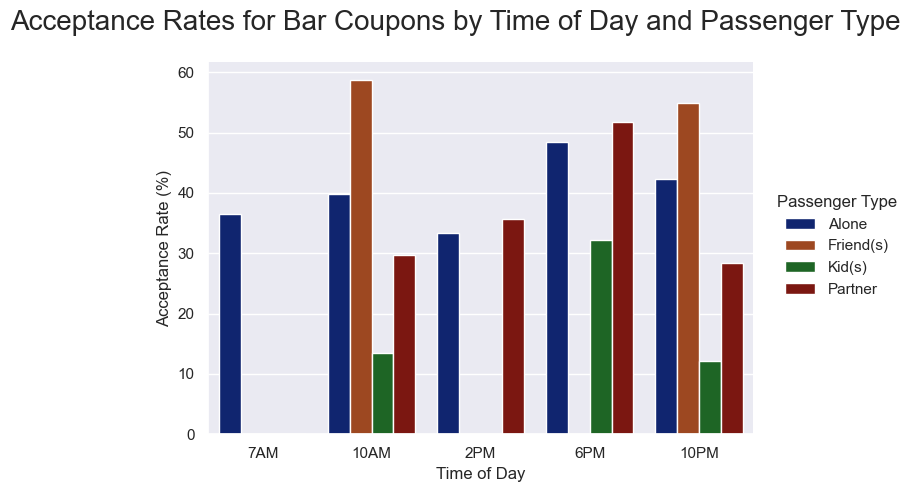

In [109]:
# Create a grouped bar plot using Seaborn's catplot
alt1 = sns.catplot(data=time_passenger_group, x='Time of Day', y='Acceptance Rate', hue='Passenger Type', kind='bar', palette='dark')

# Set the plot title and axis labels
alt1.fig.suptitle('Acceptance Rates for Bar Coupons by Time of Day and Passenger Type', fontsize=20)
alt1.set_axis_labels('Time of Day', 'Acceptance Rate (%)')

# Adjust layout for better viewing
plt.tight_layout()
plt.show()

## By Passenger Type

### Alone Group

*  **Consistent Performance:** The "alone" group consistently has relatively high acceptance rates across all times of day. This implies that drivers traveling alone are open to bar promotions, possibly due to the flexibility of solo travel.

*  **Peak Periods:** The "alone" group outperforms other groups consistently, suggesting that bar coupons can effectively attract solo travelers regardless of the time.

### Friends Group

*  **10 AM and 10 PM Peaks:** Drivers traveling with friends show high acceptance rates specifically at 10 AM and 10 PM. These peaks suggest that friends are likely to accept bar promotions after morning social activities and late-night outings, respectively.

*  **Afternoon Decline:** Acceptance rates for friends dip significantly in the afternoon, potentially because afternoon travel is more about personal errands or non-bar activities.

### Partners Group

*  **Moderate Acceptance:** Drivers traveling with partners have moderate acceptance rates throughout the day. While not reaching the same peaks as other groups, they are still relatively consistent.

*  **Evening Peak:** Partners show their highest acceptance rates in the evening, indicating that evening outings provide an opportunity for bar promotions among couples.

## General Insights

*  **Time-of-Day Impact:** Acceptance rates vary with time of day for most groups, reinforcing the importance of timing promotions. Morning and evening periods provide unique opportunities.

*  **Passenger Type Trends:** The "alone" group stands out for consistently high acceptance rates, while the friends group shows specific peaks at certain times.

### Marketing Recommendations

*  **Alone Group:** Develop strategies to reach solo travelers who appear responsive to bar coupons throughout the day.

*  **Friends Group:** Focus on morning and late-night promotions, aligning with peak acceptance rates for the friends group.

*  **Partner Group:** Tailor evening promotions to couples, emphasizing social outings at bars.



# Acceptance Rates for Bar Coupons by Time of Day and Bar Attendance Frequency

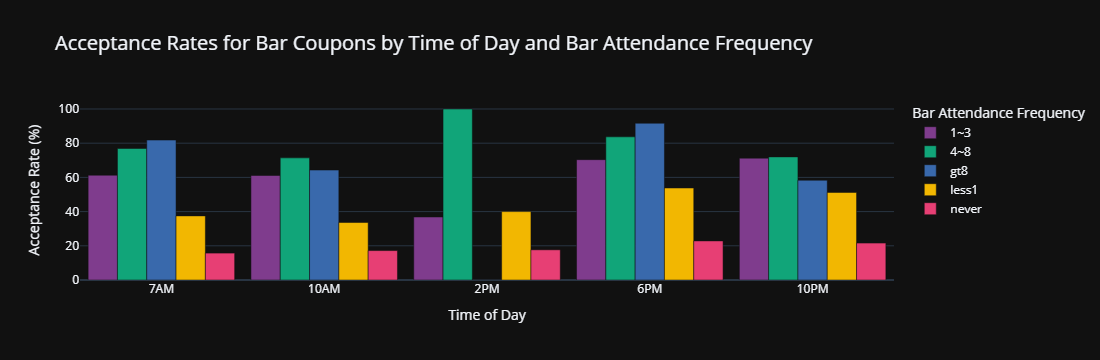

In [104]:
# Group data by time of day and bar attendance frequency, then calculate acceptance rates
time_bar_group = bar_coupons.groupby(['time', 'Bar'])['Y'].mean().reset_index()
time_bar_group.columns = ['Time of Day', 'Bar Attendance Frequency', 'Acceptance Rate']
time_bar_group['Acceptance Rate'] *= 100  # Convert to percentage

# Convert 'Time of Day' to a categorical variable with a custom order
time_bar_group['Time of Day'] = pd.Categorical(time_bar_group['Time of Day'], categories=time_order, ordered=True)

# Ensure all specified time periods are included
# Create a new DataFrame index with all combinations of time periods and bar attendance frequencies
time_bar_combinations = pd.MultiIndex.from_product([time_order, time_bar_group['Bar Attendance Frequency'].unique()], names=['Time of Day', 'Bar Attendance Frequency'])
time_bar_group = time_bar_group.set_index(['Time of Day', 'Bar Attendance Frequency']).reindex(time_bar_combinations, fill_value=0).reset_index()

# Create a grouped bar chart using Plotly Express
fig = px.bar(
    data_frame=time_bar_group,
    x='Time of Day',
    y='Acceptance Rate',
    color='Bar Attendance Frequency',
    barmode='group',  # Group bars by bar attendance frequency
    labels={'Acceptance Rate': 'Acceptance Rate (%)'},
    title='Acceptance Rates for Bar Coupons by Time of Day and Bar Attendance Frequency',
    color_discrete_sequence=px.colors.qualitative.Bold
)

# Maintain earlier format
fig.update_layout(
    xaxis_title='Time of Day',
    yaxis_title='Acceptance Rate (%)',
    title_font_size=20,
    template='plotly_dark',
    bargap=0.1
)

fig.show()

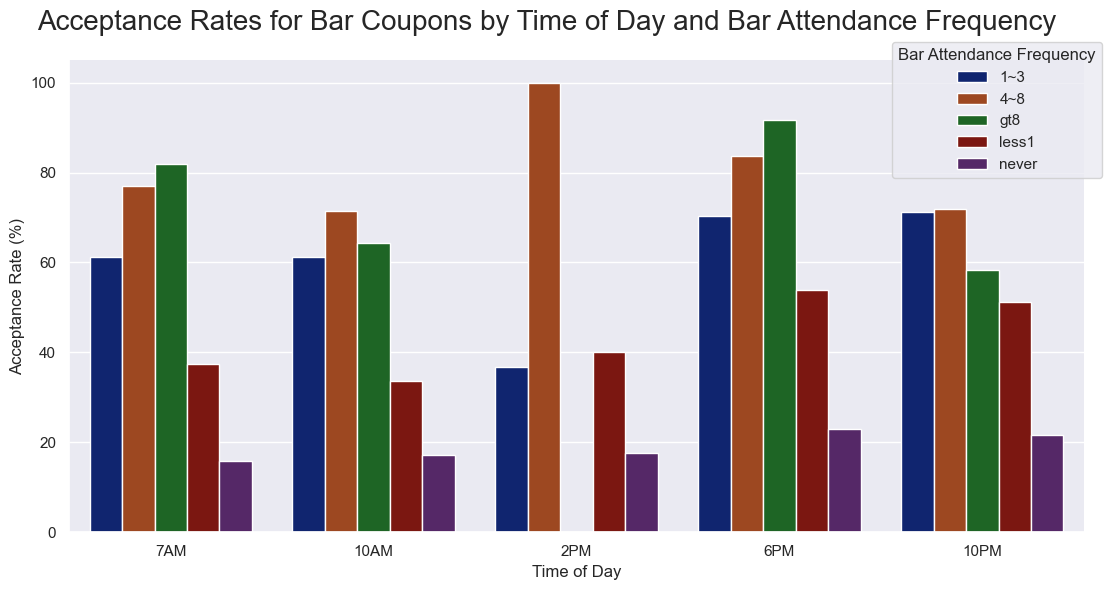

In [112]:
# Convert 'Time of Day' to a categorical variable with a custom order
time_bar_group['Time of Day'] = pd.Categorical(time_bar_group['Time of Day'], categories=time_order, ordered=True)

# Alternate seaborn plot
sns.set_theme(style='darkgrid')
alt2 = sns.catplot(
    data=time_bar_group,
    x='Time of Day',
    y='Acceptance Rate',
    hue='Bar Attendance Frequency',
    kind='bar',
    palette='dark',
    height=6,
    aspect=1.5
)

# Adjust legend position as original overlapped plot
alt2.legend.set_bbox_to_anchor((1.0, 0.8))  # Moves legend to the upper right of the plot
alt2.legend.set_frame_on(True)  # Adds a frame

# Plot title and label adjustment
alt2.fig.suptitle('Acceptance Rates for Bar Coupons by Time of Day and Bar Attendance Frequency', fontsize=20)
alt2.set_axis_labels('Time of Day', 'Acceptance Rate (%)')

plt.tight_layout()
plt.show()

## Time of Day

### Early Morning (7 AM)

*  **Rare Visitors (Less than 1 time/month):** Drivers who visit bars less than once a month show very low acceptance rates at 7 AM, likely due to early morning routines focused on work or personal activities.

*  **Occasional Visitors (1-3 times/month):** This group has low acceptance rates early in the morning, which indicates that occasional bar visitors do not prioritize bar outings at 7 AM.

*  **Frequent Visitors (4 or more times/month):** The frequent visitors group also has lower acceptance rates at 7 AM, as early morning travel is less aligned with typical bar outings.

### Morning (10 AM)

*  **Rare Visitors:** Drivers in this category have relatively low acceptance rates in the morning because bar visits aren't a common activity at this time.

*  **Occasional Visitors:** Acceptance rates improve for drivers who visit bars occasionally, suggesting some openness to morning bar coupons.
Frequent Visitors: Higher acceptance rates among frequent bar visitors imply a consistent interest in bar promotions during the morning.

### Afternoon (2 PM)
*  **Rare Visitors:** Acceptance rates remain low, indicating that rare visitors prioritize other activities in the afternoon.

*  **Occasional Visitors:** Moderate acceptance rates indicate that this group is more receptive to bar coupons in the afternoon than in the morning.

*  **Frequent Visitors:** The high acceptance rates among frequent bar visitors demonstrate their strong inclination to use bar coupons in the afternoon.

### Evening (6 PM)

*  **Rare Visitors:** The evening sees increased acceptance rates even among rare bar visitors, as evening travel aligns better with social outings.

*  **Occasional and Frequent Visitors:** Both groups maintain high acceptance rates in the evening due to a greater likelihood of social plans.

### Late Evening (10 PM)

*  **Occasional and Frequent Visitors:** High acceptance rates at 10 PM reflect the popularity of late-night social activities among these groups.

*  **Rare Visitors:** The acceptance rate for rare visitors remains low, indicating less engagement in late-night bar outings.

## General Insights

### Early Morning Limitations (7 AM)

*  Acceptance rates are low across all groups in the early morning because bar outings are generally not prioritized.

### Bar Attendance Frequency Trends

*  **Frequent Visitors:** Those who frequently attend bars consistently show high acceptance rates across most times.

*  **Occasional Visitors:** This group's openness to bar coupons peaks in the afternoon and evening.

### Marketing Strategies

*  **7 AM Offers:** Limited effectiveness in this slot suggests focusing efforts on later periods.

*  **Frequent Visitors:** Promote afternoon and evening discounts to reach this receptive audience.


# Acceptance Rates for Bar Coupons by Time of Day and Marital Status

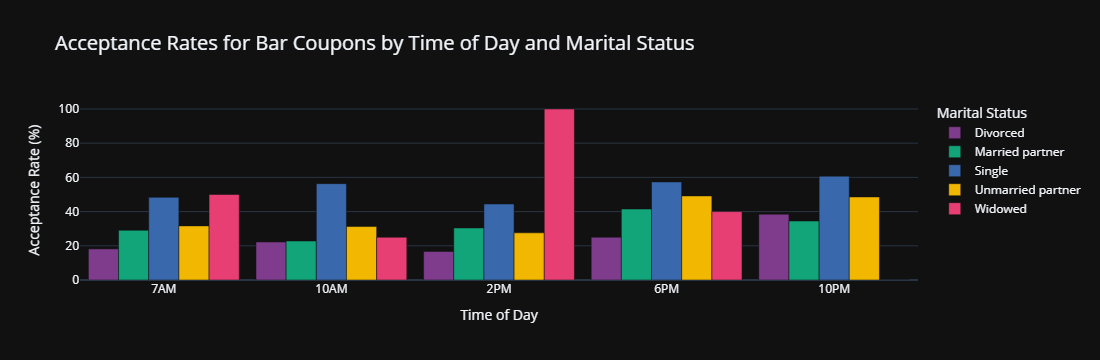

In [105]:
# Group data by time of day and marital status, then calculate acceptance rates
time_marital_group = bar_coupons.groupby(['time', 'maritalStatus'])['Y'].mean().reset_index()
time_marital_group.columns = ['Time of Day', 'Marital Status', 'Acceptance Rate']
time_marital_group['Acceptance Rate'] *= 100  # Convert to percentage

# Convert 'Time of Day' to a categorical variable with the specified custom order
time_marital_group['Time of Day'] = pd.Categorical(time_marital_group['Time of Day'], categories=time_order, ordered=True)

# Ensure all specified time periods and marital statuses are included
# Create a new DataFrame index with all combinations of time periods and marital statuses
time_marital_combinations = pd.MultiIndex.from_product([time_order, time_marital_group['Marital Status'].unique()], names=['Time of Day', 'Marital Status'])
time_marital_group = time_marital_group.set_index(['Time of Day', 'Marital Status']).reindex(time_marital_combinations, fill_value=0).reset_index()

# Create a grouped bar chart using Plotly Express
fig = px.bar(
    data_frame=time_marital_group,
    x='Time of Day',
    y='Acceptance Rate',
    color='Marital Status',
    barmode='group',  # Group bars by marital status
    labels={'Acceptance Rate': 'Acceptance Rate (%)'},
    title='Acceptance Rates for Bar Coupons by Time of Day and Marital Status',
    color_discrete_sequence=px.colors.qualitative.Bold
)

# Maintain earlier format
fig.update_layout(
    xaxis_title='Time of Day',
    yaxis_title='Acceptance Rate (%)',
    title_font_size=20,
    template='plotly_dark',
    bargap=0.1 # Make time groups easier to see
)

# Display the plot
fig.show()

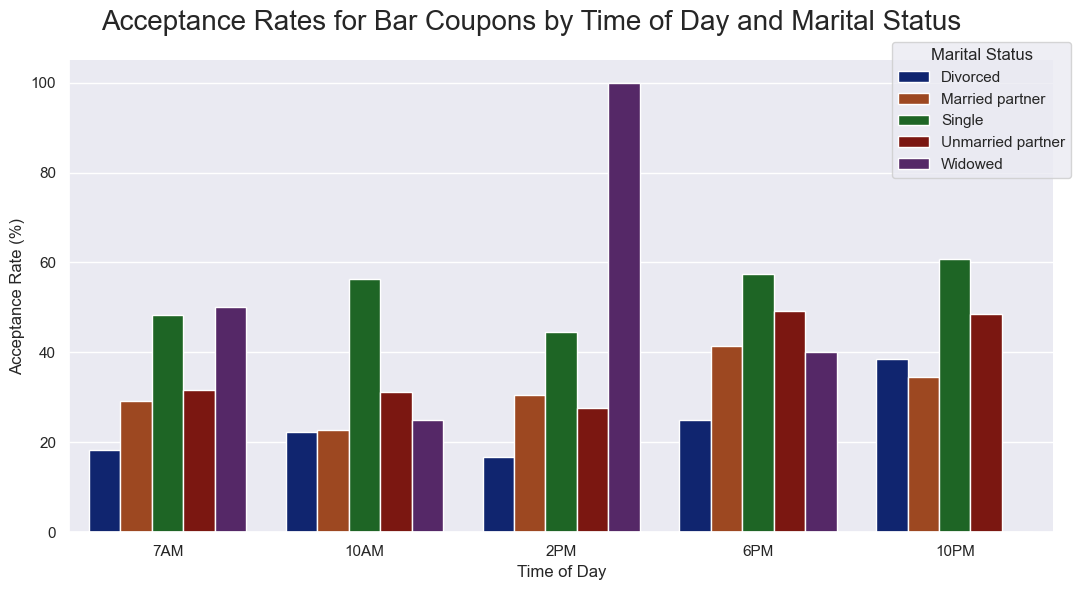

In [113]:
# Seaborn example
sns.set_theme(style='darkgrid')
alt3 = sns.catplot(
    data=time_marital_group,
    x='Time of Day',
    y='Acceptance Rate',
    hue='Marital Status',
    kind='bar',
    palette='dark',
    height=6,
    aspect=1.5
)

# Adjust legend position
alt3.legend.set_bbox_to_anchor((1.0, 0.8))  # Moves legend to the right of the plot
alt3.legend.set_frame_on(True)  # Adds a frame to improve readability

# Set the plot's title and adjust labels
alt3.fig.suptitle('Acceptance Rates for Bar Coupons by Time of Day and Marital Status', fontsize=20)
alt3.set_axis_labels('Time of Day', 'Acceptance Rate (%)')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

In [114]:
# Count the number of widowed drivers
num_widowed = bar_coupons[bar_coupons['maritalStatus'].str.contains('Widowed', case=False, na=False)].shape[0]

# Output the result
num_widowed

21

In [87]:
# Filter for widowed drivers who accepted coupons at 2 PM
widowed_accepted_2pm = bar_coupons[
    (bar_coupons['maritalStatus'].str.contains('Widowed', case=False, na=False)) &
    (bar_coupons['time'] == '2PM') &
    (bar_coupons['Y'] == 1)  # Accepted the coupon (Y = 1)
]

# Count the number of matching rows
num_widowed_accepted_2pm = widowed_accepted_2pm.shape[0]

# Output the result
num_widowed_accepted_2pm


1

In [106]:
# Group data by marital status and time to get the counts
marital_time_counts = bar_coupons.groupby(['maritalStatus', 'time']).size().reset_index(name='Count')

# Create a pivot table to organize the results
pivot_marital_time = marital_time_counts.pivot(index='maritalStatus', columns='time', values='Count')

# Replace NaN with 0 for counts
pivot_marital_time.fillna(0, inplace=True)

# Display the table
pivot_marital_time

time,10AM,10PM,2PM,6PM,7AM
maritalStatus,,,,,
Divorced,18,13,6,16,22
Married partner,184,174,46,282,196
Single,158,140,36,143,184
Unmarried partner,80,70,29,120,79
Widowed,4,5,1,5,6


## Time of Day

### Early Morning (7 AM)

*  **Single:** Drivers who are single show low acceptance rates at 7 AM, possibly due to work or personal routines.

*  **Married:** Married drivers also show low acceptance rates in the early morning because this time slot generally aligns with other personal priorities.

*  **Unmarried Partners:** This group has a relatively low acceptance rate at 7 AM, likely due to the early hour not aligning with typical bar outing plans.

### Morning (10 AM)

*  **Single:** Single drivers have moderate acceptance rates in the morning, suggesting some openness to bar coupons after morning errands or work-related activities.

*  **Married:** Married drivers also have moderate acceptance rates, indicating a willingness to consider bar promotions during morning travel.

*  **Unmarried Partners:** Higher acceptance rates suggest that this group might incorporate bar outings into their morning social plans.

### Afternoon (2 PM)

*  **Single:** Acceptance rates for single drivers improve slightly in the afternoon as social plans can involve bar outings after work or during lunch breaks.

*  **Married:** Married drivers show moderate acceptance rates, likely due to a mix of social outings and other activities in the afternoon.

*  **Unmarried Partners:** Unmarried partners have consistently high acceptance rates, indicating a strong inclination toward bar promotions during the afternoon.
*  **Widowed:** Whereas widowed drivers are 100% accepting of these coupons? There is only 21 total in the dataset and only one single widoed person accepted a coupon at 2PM, representing 100%.  This is not very useful information to build any mareketing campaign from.

### Evening (6 PM)

*  **Single:** Single drivers show high acceptance rates in the evening, suggesting that evening is a more favorable time for social plans involving bar outings.

*  **Married:** The married group also has high acceptance rates, indicating that evening is a popular time for couples to consider bar promotions.

*  **Unmarried Partners:** This group has the highest acceptance rates in the evening, likely due to evening social outings aligning well with bar coupon usage.

### Late Evening (10 PM)

*  **Single:** Single drivers show moderate acceptance rates in the late evening, indicating that social plans may extend into the night.

*  **Married:** Married drivers have lower acceptance rates at 10 PM, possibly due to personal schedules or fewer late-night outings.

*  **Unmarried Partners:** This group maintains high acceptance rates at 10 PM, suggesting that bar coupons align with their social plans.

## General Insights

### Marital Status Trends

*  **Unmarried Partners:** This group consistently has high acceptance rates across all times of day, indicating strong responsiveness to bar coupons.

*  **Married:** Married drivers show moderate to high acceptance rates, particularly in the evening.

*  **Single:** Single drivers have relatively consistent acceptance rates, especially in the evening.

### Time-of-Day Patterns

*  **7 AM:** Low acceptance rates across all groups suggest focusing on later times for bar coupon promotions.

*  **Evening (6 PM & 10 PM):** Evening hours remain favorable across all groups due to greater social activity.

### Marketing Strategies

*  **Evening Offers:** Tailor evening promotions for unmarried partners and single drivers to align with their high acceptance rates.

*  **Morning Focus:** Morning promotions should target unmarried partners who show openness to bar coupons after errands or morning travel.


# SUMMARY OF FINDINGS

## After cleaning, crunching and analyzing this dataset and exploring a myriad of factors that can influence a person or persons to accept a bar coupon as a passing by driver, I present the following observations of various trends and insights that ermeged from this excercise and offer several recommendations:

### Car inhibitant Type

*  **Drivers traveling alone:** Drivers traveling alone consistently showed strong acceptance rates across most times of the day, likely due to the flexibility of solo travel.

*  **Drivers traveling with friends:** Within the "friends" group, there exhibited peaks in coupon acceptance rates at the 10 AM and 10 PM times, which may be an indication that morning and late-night outings align well with bar promotions for social groups.

*  **Drivers traveling with Partners:** The asumption was made that 'partners' infered 'couples'. The evening is the best time for promotions targeting couples, who presumably might often include bar outings as part of their evening social plans.

### Bar Attendance Frequency

*  **Frequent Bar Visitors:** People who visit bars more frequently (4 or more times a month) consistently showed high coupon acceptance rates across different times of day, which likely reveals that they are already inclined to consider bar outings.

*  **Occasional Bar Visitors:** Passengers who occasionally visit bars are open to bar coupons, particularly in the afternoon and evening, where acceptance rates are moderate to high.

### Marital Status

*  **Unmarried Partners:** This group of people have the highest acceptance rates across all times of day, especially in the afternoon and evening. Unmarried partners likely have more active social lives as a whole than married partners.

*  **Single and Married Passengers:** These groups also show high acceptance rates in the evening, while their morning and afternoon acceptance rates are generally moderate.

### Time of Day

*  **7 AM:** Generally low acceptance rates are plausibly due to early morning routines focused on work and professional activities. 

*  **10 AM and 2 PM:** Morning and afternoon acceptance rates are higher among frequent visitors and social groups.

*  **6 PM and 10 PM:** Evening and late-night periods have consistently high acceptance rates due to more social opportunities.

## Marketing Recommendations

### Tailor Promotions by Time of Day

*  **Afternoon/Evening:** Focus on afternoon and evening promotions for all groups, aligning with higher social activity.

*  **Morning Promotions:** Target specific groups like friends and unmarried partners who show consistent openness to bar coupons in the morning.

### Create Group-Based Offers

*  Develop group-based offers for friends and partners, as their collective plans often drive higher acceptance rates.

### Leverage Bar Attendance Patterns

*  Frequent visitors are the most responsive to bar coupons. Utilize loyalty programs or exclusive discounts to attract them further.

### Social Media and Targeted Marketing

*  Promote bar coupons through social media channels and targeted campaigns that align with specific travel patterns, social habits, and demographic data.

## These recommendations will help align bar coupon marketing strategies with the preferences and behaviors of potential customers, maximizing acceptance rates.